# Import Data

In [1]:
pip install matplotlib


You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


## Import Library

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler


# Formating DataFrame to 2 point decimal

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Read Data CSV

In [4]:
information = pd.read_csv('Dataset.csv')
print(information.dtypes)
information.head()


gmat                 int64
gpa                float64
work_experience      int64
admitted             int64
dtype: object


,gmat,gpa,work_experience,admitted
0,780,4.00,3,1
1,750,3.90,4,1
2,690,3.30,3,0
3,710,3.70,5,1
4,680,3.90,4,0


# Cleaning Data

In [5]:
information = information.drop(information[information.gmat == 640].index)
information.head()


,gmat,gpa,work_experience,admitted
0,780,4.00,3,1
1,750,3.90,4,1
2,690,3.30,3,0
3,710,3.70,5,1
4,680,3.90,4,0


# Display with Hist The data

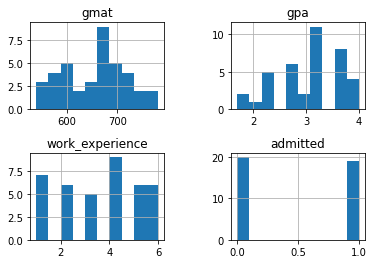

In [6]:
information.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()


# Show Scatter of the data

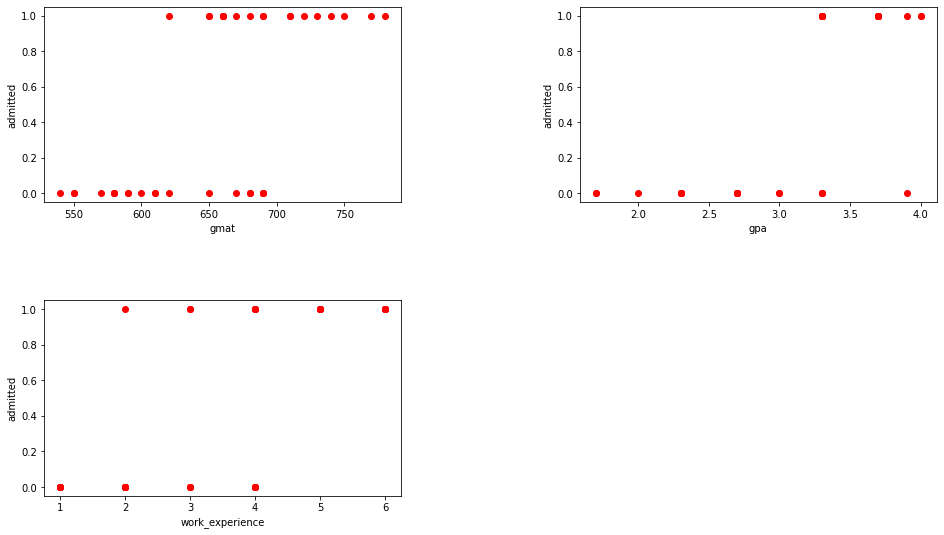

In [7]:
plt.subplot(2,2,1)
plt.scatter(information["gmat"],
            information["admitted"], color="red")
plt.xlabel("gmat")
plt.ylabel("admitted")

plt.subplot(2,2,2)
plt.scatter(information["gpa"],
            information["admitted"], color="red")
plt.xlabel("gpa")
plt.ylabel("admitted")

plt.subplot(2,2,3)
plt.scatter(information["work_experience"],
            information["admitted"], color="red")
plt.xlabel("work_experience")
plt.ylabel("admitted")

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()


# Correlation of data

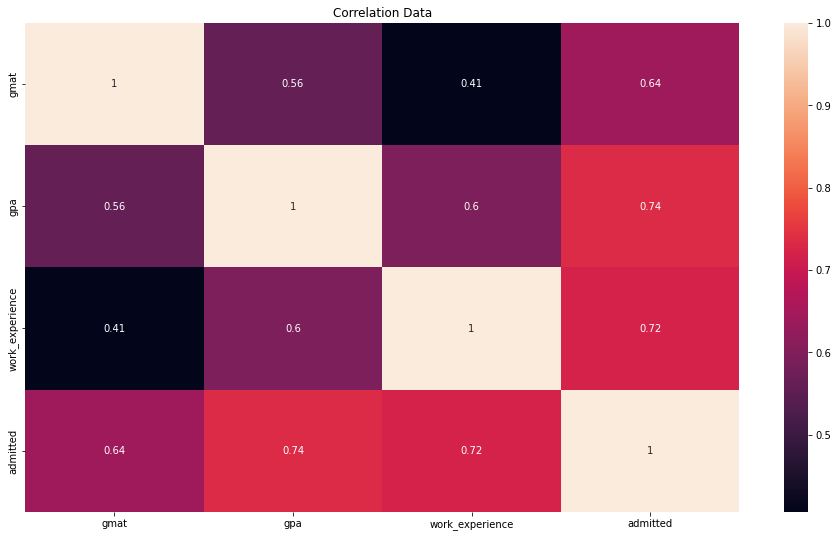

In [8]:
sb.heatmap(information.corr(), annot=True)
plt.title("Correlation Data")
plt.show()

# Split data for X -> features dan y sebagai result

In [9]:
x = information[["gmat", "gpa", "work_experience"]]
y = information[["admitted"]]


# Normalize Data

In [10]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns, index=x.index)
x.head()


,gmat,gpa,work_experience
0,1.00,1.00,0.40
1,0.88,0.96,0.60
2,0.62,0.70,0.40
3,0.71,0.87,0.80
4,0.58,0.96,0.60


# Split data menjadi 75% untuk training dan 25% untuk testing

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x , y, train_size = 0.75, test_size = 0.25, shuffle=False)
print(x_train)
print(x_test)

    gmat  gpa  work_experience
0   1.00 1.00             0.40
1   0.88 0.96             0.60
2   0.62 0.70             0.40
3   0.71 0.87             0.80
4   0.58 0.96             0.60
5   0.79 0.87             1.00
6   0.62 0.26             0.00
7   0.75 0.70             0.60
8   0.83 0.70             0.80
9   0.62 0.00             0.00
10  0.29 0.43             0.40
11  0.62 0.87             0.80
12  0.71 0.87             1.00
13  0.58 0.70             0.60
14  0.96 0.70             0.40
15  0.29 0.57             0.00
16  0.17 0.43             0.60
17  0.46 0.87             1.00
18  0.00 0.43             0.20
19  0.21 0.26             0.40
20  0.33 0.70             0.20
21  0.25 0.13             0.00
22  0.04 0.26             0.60
23  0.04 0.43             0.00
24  0.12 0.57             0.20
25  0.54 0.70             1.00
26  0.50 0.87             0.60
27  0.17 0.26             0.20
28  0.46 0.87             1.00
    gmat  gpa  work_experience
29  0.50 0.70             0.80
31  0.33

# Create Naive Bayes Model

In [12]:
class NaiveBayesProgram():
    def __init__(self):
        self.params ={}
        self.ClassPrior ={}
        self.classes = np.array
        self.posterior = np.array([])
    
    def SeperateClass(self, Data):
        Data = Data.sort_values(by=['admitted'])
        SplitResult = {}
        for classData in self.classes:
            SplitResult[classData] = Data[Data['admitted'] == classData].loc[:, Data.columns != 'admitted']
        return SplitResult

    def fit(self, x, y):
        for col in x.columns:
            self.params[col] ={}

        data = pd.concat([x, y], axis=1)

        self.features = list(x.columns)
        self.classes = y['admitted'].unique()
        SplitResult = self.SeperateClass(data)

        for cls in self.classes:
            self.ClassPrior[cls] = len(SplitResult[cls])/len(data)
        self.CalculationMean(SplitResult)
        

    def CalculationMean(self, SplitResult):
        for i in SplitResult:
            for j in SplitResult[i]:
                mean = self.MeanCalculation(SplitResult[i][j])
                Dev = self.StdDevCalculation(SplitResult[i][j])
                self.params[j][i] = {
                    'MeanResult' : mean,
                    'DevResult' : Dev
                }

    def MeanCalculation(self, Data):
        return sum(Data)/float(len(Data))
    
    def StdDevCalculation(self, Data):
        Mean = self.MeanCalculation(Data)
        TotalSum = 0
        for x in Data:
            TotalSum += (x-Mean)**2
        StdDev = TotalSum/float(len(Data)-1)
        return sqrt(StdDev)
    
    def ExponentCalculation(self, x, mean, Dev):
        Result = np.exp(-((x-mean)**2)/(2*Dev**2))
        return Result * (1/(sqrt(2*np.pi)*Dev))

    def predict(self, X_Data):
        PredictResult = []
        for i in range(len(X_Data)):
            Array = np.array([])
            for classData in self.classes:
                Value = 1
                for col in X_Data.columns:
                    mean = self.params[col][classData]['MeanResult']
                    Dev = self.params[col][classData]['DevResult']
                    XData = X_Data.iloc[i][col]
                    Value *= self.ExponentCalculation(XData, mean, Dev)
                Array = np.append(Array, Value)
            PredictResult.append((self.classes[np.argmax(Array)]))
        return PredictResult
        



# Accuracy Calculation

In [13]:
def accuracy_score(y_true, y_pred):
	return round(float(sum(y_pred == y_true))/float(len(y_true)) * 100, 2)

# Train The Model using Training Dataset

In [14]:
model = NaiveBayesProgram()
model.fit(x_train, y_train)

NameError: name 'sqrt' is not defined

# Testing Dataset

In [ ]:
Predict = model.predict(x_test)
Predict


[1, 0, 1, 1, 1, 0, 0, 0, 0, 1]

In [ ]:
Result = pd.DataFrame({
    'Result' : y_test.iloc[:, 0].tolist(),
    'Predict Result': Predict
})
Result


,Result,Predict Result
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


In [ ]:
print("Train Accuracy: {}".format(accuracy_score(
    Result['Result'], Result['Predict Result'])))


Train Accuracy: 100.0


# Validate Data

In [ ]:
DataValidate = [[690, 3.2, 2], [550, 2.2, 0], [660, 2.7, 3], [530, 3.5, 3]]
df = pd.DataFrame(DataValidate, columns=['gmat', 'gpa', 'work_experience'])
df


,gmat,gpa,work_experience
0,690,3.20,2
1,550,2.20,0
2,660,2.70,3
3,530,3.50,3


In [ ]:
scaler = MinMaxScaler()
dfData = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
dfData


[1, 0, 0, 1]

In [ ]:
Predict = model.predict(dfData)
Predict
